<a href="https://colab.research.google.com/github/fbrinadze/NJIT-Data-Science-Bootcamp/blob/main/Final_Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [1]:
#Step 1a
#Pip Install for external PrettyTables
!pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
#Step 1b
#Loading libararies 
from prettytable import PrettyTable
import pandas as pd
import numpy as np
from numpy import sort
from sklearn.impute import SimpleImputer
from datetime import datetime
import warnings
import matplotlib
%matplotlib inline


#Graphic Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder

#Pipelines
from sklearn.pipeline import Pipeline

#importing models
from sklearn.linear_model	import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold

#Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.utils.extmath import randomized_svd

#For Hypertuning XGBOOST
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#turn off all warnings
warnings.filterwarnings('ignore')

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [4]:
#Step 2
from google.colab import files
titanic = files.upload()




Saving Titanic.csv to Titanic.csv


#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [5]:
#Step 3a
titanic = pd.read_csv('Titanic.csv')
titanic.head(5)
#Survived Looks like it will be the target.  
#Does not look like I will need PassengerId or Name at this point.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Step 3b
#data types and columns
print("\tDtypes")
print("------------------------")
print(titanic.dtypes)

	Dtypes
------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
#Descriptive Stats
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualization of the data

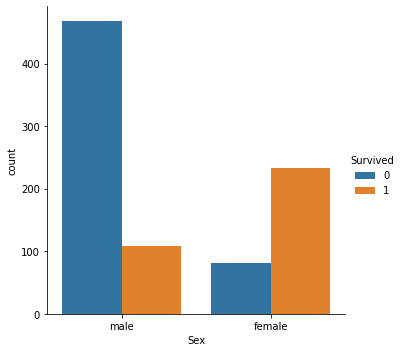

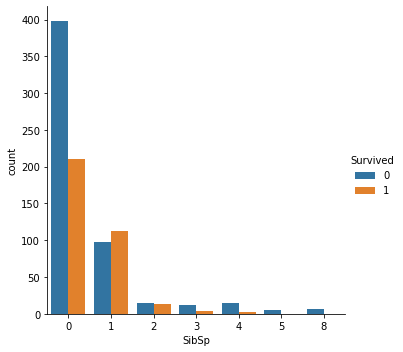

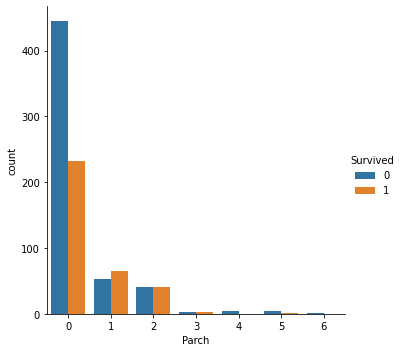

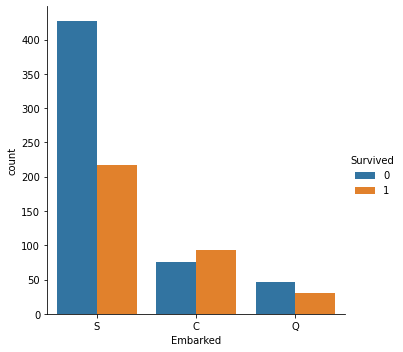

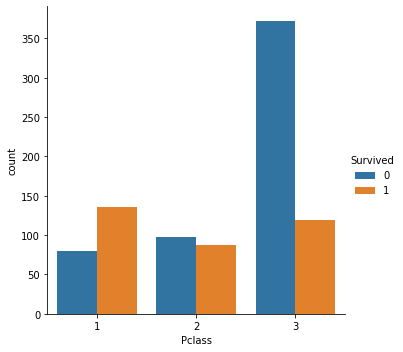

In [8]:
#Plotting out Sex, SibSip, Parch, Embarked, Pclass.  I am going to seperatly
#Graph age.  I tried it earlier, and the visualization was very messy

sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)
#for more females survived vs male

sns.catplot(x ="SibSp", hue ="Survived",
kind ="count", data = titanic)
#looks like more only children survived or people alone

sns.catplot(x ="Parch", hue ="Survived",
kind ="count", data = titanic)

sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = titanic)
#more people who embarked on south hampton survived

sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = titanic)
#more 1st class followed by 3rd then 2nd survived


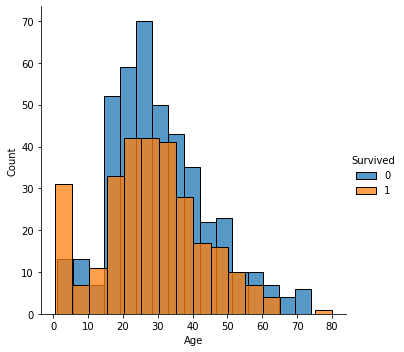

In [11]:
#Visualizaing Age
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "Age") \
   .add_legend()
plt.show()
#ages 20 - 30 survived the most, followed by people in their 40s.  I had assumed more children survivers.
# Use the below graphs to make the age bins

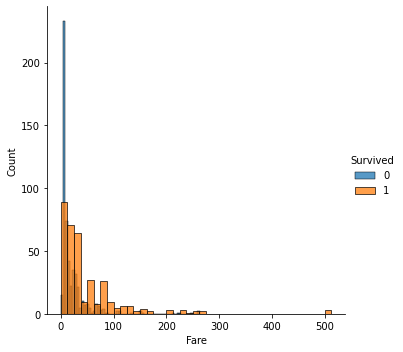

In [12]:
sns.FacetGrid(titanic, hue="Survived", height=5) \
   .map(sns.histplot, "Fare") \
   .add_legend()
plt.show()
#nothing really interesting here with Fare.

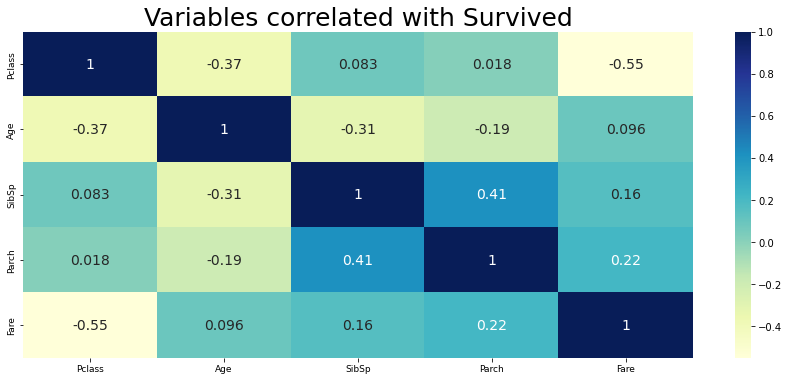

In [9]:
# Interested in seeing if anything correlates with Survived.
correlation = titanic.copy()
correlation = correlation.drop(columns=['PassengerId'], axis=1)
correlation = correlation.set_index("Survived")
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(correlation.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Variables correlated with Survived", fontsize = 25)
ax.tick_params(axis = "both", which = "major", labelsize = 9)
ax.tick_params(axis = "both", which = "minor", labelsize = 9)
plt.show()
#Sibsp and Parch somewhat correlate with Survived but it is not Strong
#Nothing really screams out about Fare.  So I am going to drop that as a feature

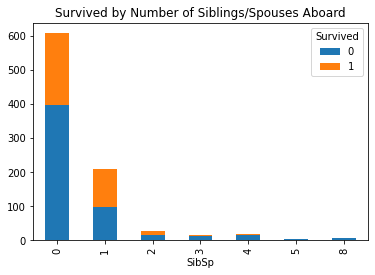

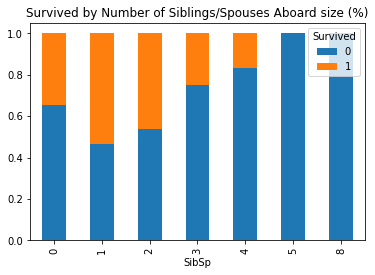

In [10]:
#want to compare sibsp and parch and see if there is anything to make here
pd.crosstab(titanic['SibSp'], titanic['Survived']).plot(kind='bar', stacked=True, title="Survived by Number of Siblings/Spouses Aboard")
pd.crosstab(titanic['SibSp'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by Number of Siblings/Spouses Aboard size (%)")
#Seems like alot of singles survived.

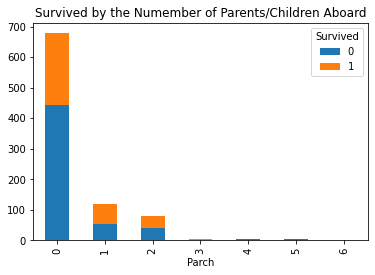

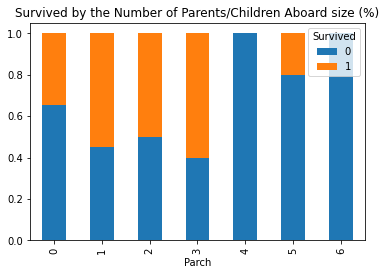

In [11]:
#want to compare sibsp and parch and see if there is anything to make here
pd.crosstab(titanic['Parch'], titanic['Survived']).plot(kind='bar', stacked=True, title="Survived by the Numember of Parents/Children Aboard")
pd.crosstab(titanic['Parch'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by the Number of Parents/Children Aboard size (%)")
#Similar to Sibsp, many Single Parents / Children Survived
#Potentially combine the two features into Family_Unit as a feature

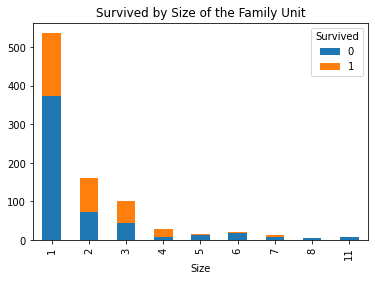

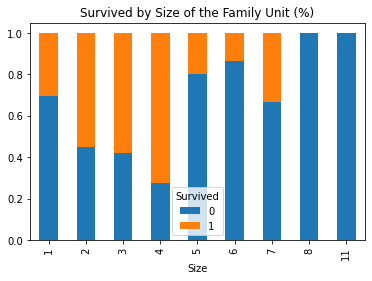

In [12]:
#create a Family_Unit Visualization
Family_Unit = titanic['SibSp'] + titanic['Parch'] + 1
Family_Unit = pd.DataFrame(Family_Unit, columns=['Size'])
pd.crosstab(Family_Unit['Size'], titanic['Survived']).plot(kind='bar', stacked=True, title="Survived by Size of the Family Unit")
pd.crosstab(Family_Unit['Size'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by Size of the Family Unit (%)")
#Family Sizes of 1 - 3 had a better survival chance

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In [13]:
#Step 4
#Check for missing values
titanic.isna().sum() 
#missing 177 age values and 687 cabins and 2 embarked
#Won't use cabin since so many are missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#filling in missing age with Mean
mean_imputer = SimpleImputer(strategy='mean')
titanic['Age'] = mean_imputer.fit_transform(titanic['Age'].values.reshape(-1,1))
titanic.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#one hot encode the categorical values
categorical_variables = ['Sex','Embarked']
titanic = pd.get_dummies(data=titanic, columns=categorical_variables)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [16]:
#create Age Bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] #Bins for the age bands
group_names = [10, 20, 30, 40, 50, 60, 70, 80] #Labels

titanic['Age_Categories'] = pd.cut(titanic['Age'], bins, labels=group_names)

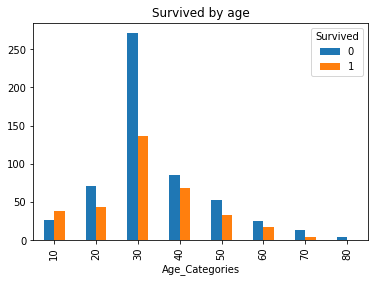

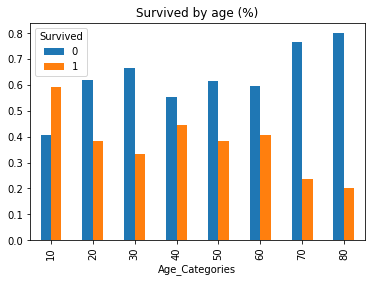

In [17]:
pd.crosstab(titanic['Age_Categories'], titanic['Survived']).plot(kind='bar', stacked=False, title="Survived by age")
pd.crosstab(titanic['Age_Categories'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=False, title="Survived by age (%)")
#This is much easier to read now with the Age Bins then just looking at titanic[Age] as a chart

In [18]:
#Create a family Unit that is a combo of SibSp + Parch
titanic['Family_Unit'] = titanic['SibSp'] + titanic['Parch'] + 1

In [19]:
#Setting Age_Caegories to an Integer and do one final check on types
titanic["Age_Categories"] = pd.to_numeric(titanic["Age_Categories"])
titanic.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Sex_female          uint8
Sex_male            uint8
Embarked_C          uint8
Embarked_Q          uint8
Embarked_S          uint8
Age_Categories      int64
Family_Unit         int64
dtype: object

In [31]:
#Creating the X and y variables
X = titanic.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket',
                          'Fare','Cabin'], axis=1)

y = titanic[['Survived']]

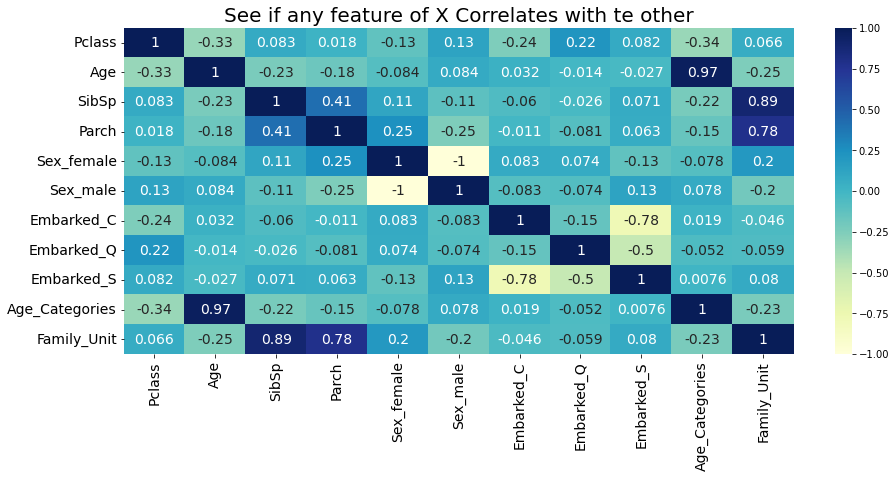

In [32]:
#do another heatmap on the features of X to see correlations
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(X.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("See if any feature of X Correlates with te other", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

In [33]:
#function for making Shapes nicer to read
def split_out_shape_values(data):
  """Creating a function that will:
    data: a variable to inspect and look for shape and return the values
  """
  try:
    return str(data.shape[0]) + " By " + str(data.shape[1])
  except:
    return str(data.shape[0]) + " By " + str(1)

#test
#print(split_out_shape_values(X_train))
#print(split_out_shape_values(y_train))

In [34]:
#Spliting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [35]:
#Checking the Shapes of X_train, y_train, X_test, y_test
shapes_info = PrettyTable(["Data Set", "Shape"])
shapes_info.add_row(['X_train', split_out_shape_values(X_train)])
shapes_info.add_row(['y_train', split_out_shape_values(y_train)])
shapes_info.add_row(['X_test', split_out_shape_values(X_test)])
shapes_info.add_row(['Y_test', split_out_shape_values(y_test)])
print(shapes_info)

+----------+-----------+
| Data Set |   Shape   |
+----------+-----------+
| X_train  | 623 By 11 |
| y_train  |  623 By 1 |
|  X_test  | 268 By 11 |
|  Y_test  |  268 By 1 |
+----------+-----------+


In [36]:
#one final check of all the columns in my X_train
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Categories',
       'Family_Unit'],
      dtype='object')

#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [37]:
# Step 5a
#Logistic Regression
log_reg_pipeline = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('log_reg', LogisticRegression(random_state=0))])
log_reg_pipeline.fit(X_train, y_train)
train_accuracy_std = round(log_reg_pipeline.score(X_train, y_train),2)
train_accuracy_std = str (train_accuracy_std * 100.0) + "%"
#print(f"Logistic Regression Score of: {train_accuracy_std * 100.0} %")
log_reg_results = PrettyTable(["Model Name", "Score"])
log_reg_results.add_row(['Logisitc Regression', train_accuracy_std])
print(log_reg_results)
#79% accuracy

+---------------------+-------+
|      Model Name     | Score |
+---------------------+-------+
| Logisitc Regression | 79.0% |
+---------------------+-------+


#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [38]:
#Step 6a
#Logistic Regression Results using Cross Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
results = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
score = round(results.mean(), 2) * 100.0
log_reg_accuracy_table = PrettyTable(["Model Name", "Accuracy", "Standard Deviation"])
log_reg_accuracy_table.add_row(['log_reg', score, round(results.std(),2)])
print(log_reg_accuracy_table)

+------------+----------+--------------------+
| Model Name | Accuracy | Standard Deviation |
+------------+----------+--------------------+
|  log_reg   |   78.0   |        0.03        |
+------------+----------+--------------------+


In [39]:
#Step 6b
#Look at the AUC for Logistic Regression
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scoring = 'roc_auc'
results = cross_val_score(log_reg_pipeline, X_train, y_train, cv=kfold, scoring=scoring)
score = round(results.mean(), 2)
#Creat the PrettyTable to Show AUC Results
log_reg_auc = PrettyTable(["Model Name", "AUC", "Standard Deviation"])
log_reg_auc.add_row(['log_reg', score, round(results.std(),2)])
print(log_reg_auc)

+------------+------+--------------------+
| Model Name | AUC  | Standard Deviation |
+------------+------+--------------------+
|  log_reg   | 0.84 |        0.03        |
+------------+------+--------------------+


Text(0.5, 1.0, 'AUC Visualization')

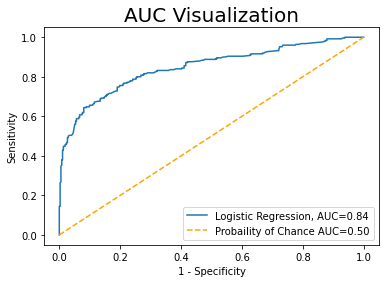

In [40]:
#Plot AUC for Logistic Regression
#set up plotting area
plt.figure(0).clf()

y_pred = log_reg_pipeline.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred)
auc = round(results.mean(), 2)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--',label = "Probaility of Chance AUC=0.50")
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
#add legend
plt.legend()
#Logistical Regression AUC is much better than 50/50 Coin flip
plt.title("AUC Visualization", fontsize =20)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

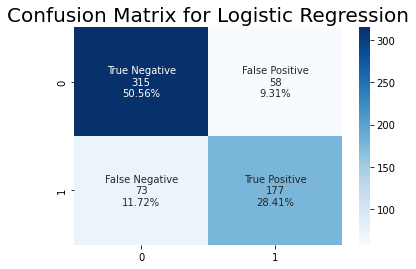

In [41]:
#Step 6c
# Creating a confusion matrix
y_predict = log_reg_pipeline.predict(X_train)
matrix = confusion_matrix(y_train, y_predict)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression", fontsize =20)

In [42]:
#Step 6d
#Classification report for Logistic Regression
y_predict = log_reg_pipeline.predict(X_train)
print(classification_report(y_train, y_predict))
#Since this is a binary classification problem
#recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       373
           1       0.75      0.71      0.73       250

    accuracy                           0.79       623
   macro avg       0.78      0.78      0.78       623
weighted avg       0.79      0.79      0.79       623



# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [70]:
#Step 7a
#Following Jason Brownlee Approach from ML Mastery with Python

###Setting up the lists to hold the Models, Name, and Results
models = [] #this list will hold all our models
names = [] #list that holds the names of each model
results_train = [] #this list will hold the results of the other lists

###Creating the Models and appending to the Models List data structure
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forrest', RandomForestClassifier()))
models.append(('GB Boost', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('XGboost', XGBClassifier()))

scoring = 'accuracy' #scoring model
x
#for loop through all the ML models
for name, model in models:
  #within the For Loop create the pipeline
  pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    (name, model)])
  model.fit(X_train, y_train) #fiting the X and y variables onto the model

  ###Create the table to show the results
  my_training_results = PrettyTable(["Model Name", "Accuracy Score", "Accuracy Standard Deviation", "AUC", "AUC Standard Deviation"])
  
  #validation section
  kfold = KFold(n_splits=10, random_state=11, shuffle=True) #setting K folds
  scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring) #cross validating the scores
  auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring='roc_auc') #calculating the Area under the curve
  #results_train.append( #appending the results to a list that I will use to persist my results later as a dataframe
      #[name, scores.mean(), scores.std(),auc.mean(), auc.std()]
  #)
  #adding the results to my table
  my_training_results.add_row([name, round(scores.mean() * 100.0,2),round(scores.std(),2), round(auc.mean() * 100.0,2), round(auc.std() * 100.0,2)])
  #End of the For Loop

#print my table
print(my_training_results)
#XGboost looks like the winner here in Accuracy, and AUC
#From here on out I am going to use XGBOOST as the winning model and will evaluate further on this model

+---------------------+----------------+-----------------------------+-------+------------------------+
|      Model Name     | Accuracy Score | Accuracy Standard Deviation |  AUC  | AUC Standard Deviation |
+---------------------+----------------+-----------------------------+-------+------------------------+
|         LDA         |     78.02      |             0.03            |  84.1 |          3.2           |
| Logistic Regression |     78.97      |             0.03            | 84.14 |          3.22          |
|         KNN         |     76.25      |             0.05            | 79.43 |          5.48          |
|         CART        |      78.5      |             0.04            | 77.03 |          2.93          |
|          NB         |     76.58      |             0.04            | 82.35 |          4.23          |
|         SVM         |     62.28      |             0.07            | 75.84 |          5.73          |
|    Random Forrest   |     77.06      |             0.04       

Text(0.5, 1.0, 'Confusion Matrix for XGBOOST')

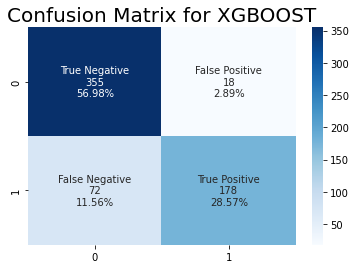

In [196]:
#Step 7b
# Creating a confusion matrix for XGBOOST
pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('XGBOOST', XGBClassifier())])
pipeline.fit(X_train, y_train)
y_predict_XGBOOST = pipeline.predict(X_train)
matrix = confusion_matrix(y_train, y_predict_XGBOOST)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion Matrix for XGBOOST", fontsize =20)

In [197]:
#Classification Report for XGBOOST
print(classification_report(y_train, y_predict_XGBOOST))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       373
           1       0.91      0.71      0.80       250

    accuracy                           0.86       623
   macro avg       0.87      0.83      0.84       623
weighted avg       0.86      0.86      0.85       623



Text(0.5, 1.0, 'AUC For XGBOOST')

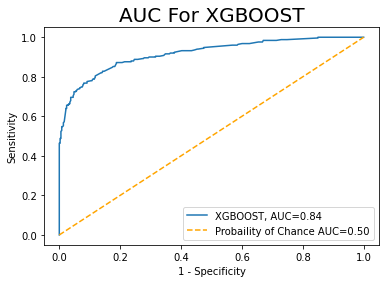

In [198]:
#Plot AUC for Logistic Regression
#set up plotting area
plt.figure(0).clf()

y_pred = pipeline.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pred)
auc = round(results.mean(), 2)
plt.plot(fpr,tpr,label="XGBOOST, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--',label = "Probaility of Chance AUC=0.50")
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
#add legend
plt.legend()
plt.title("AUC For XGBOOST", fontsize =20)
#XGBOOST AUC is much better than 50/50 Coin flip

### Dimensionality Reduction of the Best Model

In [67]:
#PCA with 3 components
X_train_s = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=3)
pca.fit(X_train_s, y_train)

print(f"Explain Variance is {pca.explained_variance_ratio_}")

Explain Variance is [0.27491115 0.20249419 0.16603833]


In [68]:
#PCA with .95%
pca = PCA(.95)
pca.fit(X_train_s)
X_train_components = pca.transform(X_train_s)
model_pca = XGBClassifier()
model_pca.fit(X_train_components, y_train)
scores = cross_val_score(model_pca, X_train_components, y_train, cv=10)
print(scores.mean())
#Accuracy with PCA is down compared to with on XGBOOST.  So I am going to not use this

0.794521249359959


[0.7784690220174091, 0.7977470558115719, 0.7993599590373784, 0.794521249359959, 0.7993343573988735, 0.8105222734254992, 0.8040706605222734, 0.8105222734254992, 0.8105222734254992, 0.8105222734254992, 0.8105222734254992, 0.8105222734254992, 0.8105222734254992]


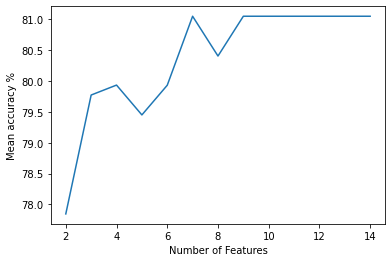

In [200]:
#RFE for XGBOOST
#Plot out the number of Features I will need for XGBOOST with RFE
features = list(range(2,15))
mean_accuracy = []

for i in features:
  pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=XGBClassifier(), n_features_to_select=i)),
                     ('log_reg', XGBClassifier())])

  pipe.fit(X_train, y_train)

  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())

print(mean_accuracy)

k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()
#7 seems to be the min number of features to get around 81 accuracy

In [201]:
pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=7)),
                     ('XGBoost', XGBClassifier())])

pipe.fit(X_train, y_train)

Feature_support = pd.DataFrame(pipe.named_steps['rfe'].support_, index=X_train.columns)
Feature_support.rename({0:'Feature Support'}, axis=1, inplace=True)
Feature_support = Feature_support.sort_values(by=['Feature Support'], ascending=False)
print(Feature_support)

                Feature Support
Pclass                     True
Age                        True
SibSp                      True
Sex_female                 True
Sex_male                   True
Age_Categories             True
Family_Unit                True
Parch                     False
Embarked_C                False
Embarked_Q                False
Embarked_S                False


In [69]:
#Tacking the results of RFE from above and remove Parch, and the Embarked
X_train_rfe = X_train.copy()
X_train_rfe.drop(columns=['Parch','Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('XGBOOST', XGBClassifier())])
pipeline.fit(X_train_rfe, y_train)
kfold = KFold(n_splits=10, random_state=11, shuffle=True) #setting K folds
scores = cross_val_score(pipeline, X_train_rfe, y_train, cv = kfold, scoring=scoring) #cross validating the scores
auc = cross_val_score(pipeline, X_train_rfe, y_train, cv = kfold, scoring='roc_auc') #calculating the Area under the curve
scores.mean()
#Score of .82 us as good with the full dataset.  I am going to go with the slimmer dataset when I do the Test


0.8670907662991503

Tune the Hyperparams of XGBOOST

In [72]:
#following info from https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost
params = {'max_depth': [3, 6, 10, 15],
          'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.5, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
          'n_estimators': [100, 250, 500, 750],
          'num_class': [10]
           }
xgbclf = XGBClassifier(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

clf.fit(X_train, y_train)
best_combination = clf.best_params_
print("Best hyperparameter combination: ", best_combination)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best hyperparameter combination:  {'subsample': 0.6, 'num_class': 10, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}


In [83]:
#Using the best params above to see if we get a better accuracy.
pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('XGBOOST', XGBClassifier(objective="multi:softmax", tree_method='hist',subsampl= 0.6, num_class=10, n_estimators=250, max_depth=3, learning_rate=0.01, colsample_bytree=0.6, colsample_bylevel=0.799999999999999))])
pipeline.fit(X_train, y_train) #fiting the X and y variables onto the model
pipeline.fit(X_train, y_train)
kfold = KFold(n_splits=10, random_state=11, shuffle=True) #setting K folds
scores = cross_val_score(pipeline, X_train, y_train, cv = kfold, scoring=scoring) #cross validating the scores
auc = cross_val_score(pipeline, X_train, y_train, cv = kfold, scoring='roc_auc') #calculating the Area under the curve

#Did not increase accuracy.  So going to stay with the default setting from above

0.8137480798771121

# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [88]:
# Step 8
pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('XGBOOST_Test', XGBClassifier())])
pipeline.fit(X_test, y_test) #fiting the X and y variables onto the model
#Create the table to display the results for later
my_test_results = PrettyTable(["Model Name", "Accuracy Score", "Accuracy Standard Deviation", "AUC", "AUC Standard Deviation"])
#validation section
kfold = KFold(n_splits=10, random_state=11, shuffle=True) #setting K folds
scores = cross_val_score(model, X_test, y_test, cv = kfold, scoring=scoring) #cross validating the scores
auc = cross_val_score(model, X_test, y_test, cv = kfold, scoring='roc_auc') #calculating the Area under the curve

#adding the results to my table
my_test_results.add_row([name, round(scores.mean() * 100.0,2),round(scores.std(),2), round(auc.mean() * 100.0,2), round(auc.std() * 100.0,2)])

#print my table
print(my_test_results)

+------------+----------------+-----------------------------+-------+------------------------+
| Model Name | Accuracy Score | Accuracy Standard Deviation |  AUC  | AUC Standard Deviation |
+------------+----------------+-----------------------------+-------+------------------------+
|  XGboost   |     83.52      |             0.06            | 80.58 |          6.03          |
+------------+----------------+-----------------------------+-------+------------------------+


In [87]:
#RFE on the test data
X_test_rfe = X_test.copy()
X_test_rfe.drop(columns=['Parch','Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
pipeline = Pipeline([
    ('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('XGBOOST', XGBClassifier())])
pipeline.fit(X_test_rfe, y_test)
kfold = KFold(n_splits=10, random_state=11, shuffle=True) #setting K folds
scores = cross_val_score(pipeline, X_test_rfe, y_test, cv = kfold, scoring=scoring) #cross validating the scores
auc = cross_val_score(pipeline, X_test_rfe, y_test, cv = kfold, scoring='roc_auc') #calculating the Area under the curve
scores.mean()
#Since the score here is smaller than without RFE version, I will go with the remaining

0.8277777777777777

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:


1.   The Titanic Dataset is a classification problem.  I was looking to best identify who would survive from the Sinking of the Titanic using the attached dataset.  Survived was the best column to use as the Target.  For the remaining features, I did some descriptive statistics and visualization of the data to target the final features.
2.   I checked for any missing data, and impuned those features.  I also one hot encoded any categorical features.  I engineered two features (Age_Categories, and Family_Unit)
3. My baseline model was logistic regression.  Since this was a classification problem, I went with that as the baseline model.
4. I wanted to compare all the classification models, so I tested the training data on LDA, Logistic, KNN, CART, NB, SVM, Random Forrest, GB Boost, Ada Boost, SGD and XGBOOS.
5. The best overall model was XGBOOST.  The mode itself in training was 82.19, with an Training AUC of 86.75.  In test, my accuracy was 83.52, and my AUC was 80.58.  

